# Projet : réaliser une étude sur les produits alimentaires

## 1 - Contexte

Vous réalisez une mission "UFC-Que Choisir". Cette association vous demande de réaliser une étude 
sur la qualité des produits alimentaires mis à disposition des consommateurs par les marques. Cette étude a vocation à aider les consommateurs dans leurs choix.

L'objectif est d'analyser les marques sur au moins les critères suivants : la qualité nutritionnelle, l'impact environnemental, la part des produits biologiques.


Pour cela, vous proposer d'utiliser les données de l'application Yuka

Voici une liste des questions que se pose l'association : 

- Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

- Quelles sont les marques qui ont le plus recours aux additifs nocifs

- Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

- Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

- Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

- Quelles sont les marques qui proposent essentiellement des produits biologiques ?

- Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ? 

- Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

- Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

- Quelles marques faut-il recommander ? 

- Quelles marques ne faut-il surtout pas recommander ? 




## 2 - Données

3 fichiers issues de l'application Yuka sont à exploiter pour réaliser l'analyse. 


Agriculture_biologique_final.csv

Qualite nutritionnelle_final.csv

Impact environnemental_final.csv

Voici le lien pour récupérer les fichiers

# https://www.dropbox.com/sh/pwsv4coi2sbbhyo/AABJ81-xWu3K2Cl0DOCmwbGsa?dl=0

## 3 - Consignes

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

## 4 - Contraintes

Votre analyse doit inclure des analyses univariées et multivariées


## 5 - Préparation de l'environnement

In [660]:
# Import des librairies
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

pd.set_option("display.max_columns", None)
sns.set()

list_color = ["r", "g", "b", "c", "m", "y"]


In [487]:
bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)


In [3]:
#Les fonctions pour initialiser les DF

def bio_init():
    bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
    return bio
def env_init():
    env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
    return env
def quali_init():
    quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)
    return quali

In [224]:
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## 6 - A vous de jouer¶

Inspirez-vous du TP vu en cours

# Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

In [25]:
nutri = quali.copy()
nutri = nutri[["brands_tags","nutriscore_grade"]]
nutri = nutri.groupby(by="brands_tags").nutriscore_grade.agg(["count"]).sort_values(by="count", ascending=False)
nutri

,count
brands_tags,
auchan,7030
carrefour,6499
u,4521
casino,3289
leader-price,3123
...,...
"knorr,unilever,knorr-schmeck-die-welt",0
"knorr,moments-gourmets,unilever",0
"knorr,knorr-professional",0


In [37]:
print("Le nombre de marque totale est :", nutri.index.nunique())
print("Ceci est une liste des marques qui affichent le nutriscore: \n", nutri[nutri["count"]>0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui affichent le nutriscore: 
                                            count
brands_tags                                     
auchan                                      7030
carrefour                                   6499
u                                           4521
casino                                      3289
leader-price                                3123
...                                          ...
ape                                            1
signature-select,better-living-brands-llc      1
selection-des-mousquetaires                    1
silvia                                         1
ever-green                                     1

[33460 rows x 1 columns]


In [39]:
print("Le nombre de marque totale est :", nutri.index.nunique())
print("Ceci est une liste des marques qui n'affichent pas le nutriscore: \n", nutri[nutri["count"]==0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui n'affichent pas le nutriscore: 
                                        count
brands_tags                                 
wahaha                                     0
olympuds                                   0
vin-bourgueil                              0
old-hop                                    0
vegetal-bion                               0
...                                      ...
knorr,unilever,knorr-schmeck-die-welt      0
knorr,moments-gourmets,unilever            0
knorr,knorr-professional                   0
knorr,knorq                                0
청정원,daesang                                0

[24838 rows x 1 columns]


([<matplotlib.patches.Wedge at 0x2343b0c39d0>,
 [Text(1.0704500126544356, -0.25325238480243156, 'Avec NS'),
  Text(-1.0704499889432313, 0.2532524850251937, 'Sans NS')],
 [Text(0.5838818250842376, -0.1381376644376899, '57.4%'),
  Text(-0.5838818121508534, 0.1381377191046511, '42.6%')])

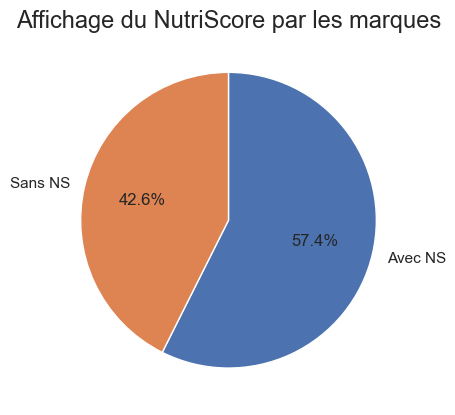

In [422]:
nutri_x = len(nutri[nutri["count"]>0])
nutri_y = len(nutri[nutri["count"]==0])

x = [nutri_x, nutri_y]
label =["Avec NS", "Sans NS"]

plt.title("Affichage du NutriScore par les marques", fontsize=17)

plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")


# Quelles sont les marques qui ont le plus recours aux additifs nocifs

In [401]:
quali.nb_nocif.unique()
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nutriscore_A,nutriscore_B,nutriscore_C,nutriscore_D,nutriscore_E
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0,NaN,NaN,NaN,NaN,NaN
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0,NaN,NaN,NaN,d,NaN
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0,NaN,NaN,NaN,NaN,NaN
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Il y a ", quali["nb_nocif"].isin([0.0]).sum(), " produit(s) sans additif nocif")
print("Il y a ", quali["nb_nocif"].isin([1.0]).sum(), " produit(s) avec 1 additif nocif")
print("Il y a ", quali["nb_nocif"].isin([2.0]).sum(), " produit(s) avec 2 additifs nocifs")

Il y a  932413  produit(s) sans additif nocif
Il y a  452  produit(s) avec 1 additif nocif
Il y a  1  produit(s) avec 2 additifs nocifs


In [415]:
quali = quali[quali["brands_tags"].notna()]
quali = quali[quali["product_name"].notna()]

In [416]:
#création nouveau DF
nocif_b = quali.copy()

#remplacer soit par inconnu soit par le nom du produit
nocif_b["brands_tags"] = nocif_b["brands_tags"].fillna(nocif_b["product_name"])

#calculer le nb de produits nocifs par marques pour les 10 plus nocifs
nocif = nocif_b.groupby(by="brands_tags").nb_nocif.agg([sum,"count"]).sort_values(by="sum", ascending=False)[:10]
#calculer par pourcentage le nb de produits nocifs par marque
nocif["ratio"] = (nocif["sum"]/nocif["count"]*100).round(2)
nocif
#les classer par leur pourcentages(option)
# nocif.sort_values(by="ratio", ascending=False)
#attention!!! si on fait count(), il affiche que la totale produits

,sum,count,ratio
brands_tags,,,
sodastream,29.0,144,20.14
"nestle,sveltesse",10.0,19,52.63
a-rom,9.0,59,15.25
dove,8.0,44,18.18
nestle,7.0,2794,0.25
schweppes,7.0,332,2.11
freeway,6.0,59,10.17
"sveltesse,nestle",5.0,8,62.50
leader-price,5.0,4538,0.11


<Axes: title={'center': '10 marques qui ont le plus recours aux additifs nocifs'}, xlabel='brands_tags'>

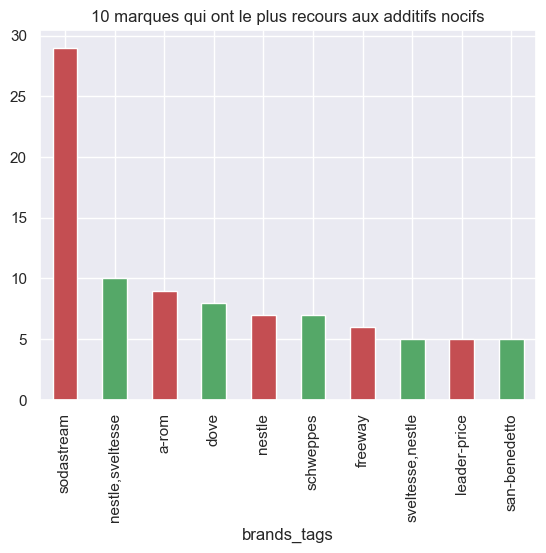

In [464]:
list_color = ["r", "g"]
nocif["sum"].plot.bar(title="10 marques qui ont le plus recours aux additifs nocifs", color=list_color)

# Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

In [611]:
quali_a

,brands_tags,nutriscore_grade,product_name
0,0,0,2
1,"0,neuhauser",1,1
2,"0,ranou",0,1
3,0-sauce,1,1
4,1,2,5
...,...,...,...
58293,"국순당,kooksoondang",0,1
58294,"데미-소다,demisoda",1,1
58295,"샘표,saempyo,sempio",0,1
58296,"자연은,jayeon-eun",0,1


In [619]:
#Créer un nouveau DF combiné

quali_temp = quali.copy()

#remplacer soit par inconnu soit par le nom du produit
quali_temp["brands_tags"] = quali_temp["brands_tags"].fillna(quali_temp["product_name"])


quali_temp.dropna(subset="nutriscore_grade", inplace=True)
quali_a = quali_temp[["brands_tags"]]

#get_dummies permets de transformer des données qualifiant sous forme bool
quali_b = pd.get_dummies(quali_temp.nutriscore_grade)

quali_marge = quali_a.join(quali_b)
quali_marge.dropna(inplace=True)

In [620]:
quali_marge

,brands_tags,a,b,c,d,e
0,danone,1,0,0,0,0
3,courte-paille,0,0,0,1,0
9,Salade de carottes râpées,0,1,0,0,0
16,"crous-resto,crous",0,0,0,1,0
22,crous,1,0,0,0,0
...,...,...,...,...,...,...
932758,Brownie Sports avec pépites de chocolat,0,0,0,1,0
932787,Bio mozzarella,0,0,1,0,0
932832,Nespresso,0,1,0,0,0
932858,Riz au lait,0,0,1,0,0


In [616]:
#transformer les bool aux chiffres
scores = {"a":5, "b":4, "c":3, "d":2, "e":1}
quali_marge["score_total"] = quali_marge[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores)), axis=1)

quali_trie = quali_marge.sort_values('score_total', ascending=False)
quali_trie


,brands_tags,a,b,c,d,e,score_total
0,danone,1,0,0,0,0,5
139255,garofalo,1,0,0,0,0,5
139216,"lustucru,panzani",1,0,0,0,0,5
418095,uncle-ben-s,1,0,0,0,0,5
418093,uncle-ben-s,1,0,0,0,0,5
...,...,...,...,...,...,...,...
444746,"betty-bossi,coop",0,0,0,0,1,1
128430,les-comtes-de-provence,0,0,0,0,1,1
444713,naturaplan,0,0,0,0,1,1
444710,"naturaplan,coop",0,0,0,0,1,1


In [623]:
top_NS

,a,b,c,d,e,score_total,Nb_produits
brands_tags,,,,,,,
auchan,1670,1084,1485,1826,965,21758,7030
carrefour,1295,945,1317,1885,1057,19033,6499
u,977,728,935,1226,655,13709,4521
casino,695,532,744,869,449,10022,3289
leader-price,529,501,721,850,522,9034,3123
...,...,...,...,...,...,...,...
duplo,0,0,0,0,1,1,1
duo saucisson+chorizo chiffonnade,0,0,0,0,1,1,1
"dunoy,intermarche,les-delices-d-auzan",0,0,0,0,1,1,1


In [626]:
top_NS = quali_trie.groupby(by="brands_tags").sum().sort_values(by="score_total", ascending=False)
top_NS["Nb_produits"] = top_NS["a"]+top_NS["b"]+top_NS["c"]+top_NS["d"]+top_NS["e"]


ind = top_NS[top_NS["Nb_produits"] <500].index
top_NS.drop(ind, inplace = True)
top_NS

,a,b,c,d,e,score_total,Nb_produits
brands_tags,,,,,,,
auchan,1670,1084,1485,1826,965,21758,7030
carrefour,1295,945,1317,1885,1057,19033,6499
u,977,728,935,1226,655,13709,4521
casino,695,532,744,869,449,10022,3289
leader-price,529,501,721,850,522,9034,3123
picard,635,409,491,516,126,7442,2177
cora,450,309,552,668,434,6912,2413
le-gaulois,422,425,719,149,8,6273,1723
monoprix,400,308,343,505,196,5467,1752


In [622]:
total_top = top_NS[["score_total"]].head(5)

#afficher top5 a -> e en points calculés
top_NS_points = top_NS.copy()
top_NS_points[["a","b","c","d","e"]] = top_NS_points[["a","b","c","d","e"]].apply(lambda row:(row*pd.Series(scores)), axis =1)
top_NS_points

,a,b,c,d,e,score_total,Nb_produits
brands_tags,,,,,,,
auchan,8350.0,4336.0,4455.0,3652.0,965.0,21758,7030
carrefour,6475.0,3780.0,3951.0,3770.0,1057.0,19033,6499
u,4885.0,2912.0,2805.0,2452.0,655.0,13709,4521
casino,3475.0,2128.0,2232.0,1738.0,449.0,10022,3289
leader-price,2645.0,2004.0,2163.0,1700.0,522.0,9034,3123
...,...,...,...,...,...,...,...
duplo,0.0,0.0,0.0,0.0,1.0,1,1
duo saucisson+chorizo chiffonnade,0.0,0.0,0.0,0.0,1.0,1,1
"dunoy,intermarche,les-delices-d-auzan",0.0,0.0,0.0,0.0,1.0,1,1


In [635]:
# DF avec du ratio A,B,C par total
top_NS_ratio = top_NS.copy()

top_NS_ratio["ratio_ABC(%)"] = ((top_NS_ratio["a"]+top_NS_ratio["b"]+top_NS_ratio["c"])/top_NS_ratio["Nb_produits"]*100).round(2)
top_NS_ratio = top_NS_ratio.sort_values(by="ratio_ABC(%)", ascending=False).head(5)
top_NS_ratio

,a,b,c,d,e,score_total,Nb_produits,ratio_ABC(%)
brands_tags,,,,,,,,
bonduelle,487,104,35,2,0,2960,628,99.68
la-nouvelle-agriculture,560,261,27,32,5,3994,885,95.82
danone,169,186,156,9,14,2089,534,95.69
le-gaulois,422,425,719,149,8,6273,1723,90.89
fleury-michon,66,339,591,101,16,3677,1113,89.49


In [634]:
# Pareil pour les pires

worst_NS_ratio = top_NS.copy()

worst_NS_ratio["ratio_DE(%)"] = ((worst_NS_ratio["d"]+worst_NS_ratio["e"])/worst_NS_ratio["Nb_produits"]*100).round(2)
worst_NS_ratio = worst_NS_ratio.sort_values(by="ratio_DE(%)", ascending=False).head(5)
worst_NS_ratio

,a,b,c,d,e,score_total,Nb_produits,ratio_DE(%)
brands_tags,,,,,,,,
lindt,0,0,0,12,491,515,503,100.00
haribo,2,6,9,491,25,1068,533,96.81
labeyrie,0,12,36,360,189,1065,597,91.96
leclerc,29,53,125,254,193,1433,654,68.35
bonne-maman,14,14,162,189,150,1140,529,64.08


<Axes: title={'center': 'Proportion des 5 meilleurs marques avec des Nutriscores A,B ou C'}, xlabel='Marques', ylabel='Ratio ABC(%)'>

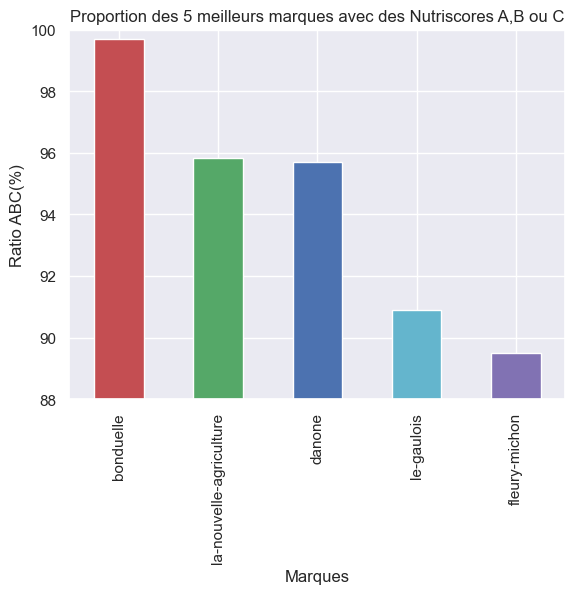

In [665]:
top_NS_ratio.iloc[:,-1].plot.bar(ylim=(88,100), ylabel="Ratio ABC(%)", xlabel="Marques",\
                                 color=list_color,\
                                 title="Proportion des 5 meilleurs marques avec des Nutriscores A,B ou C")

<Axes: title={'center': 'Proportion des 5 pires marques avec des Nutriscores D ou E'}, xlabel='Marques', ylabel='Ratio D ou E(%)'>

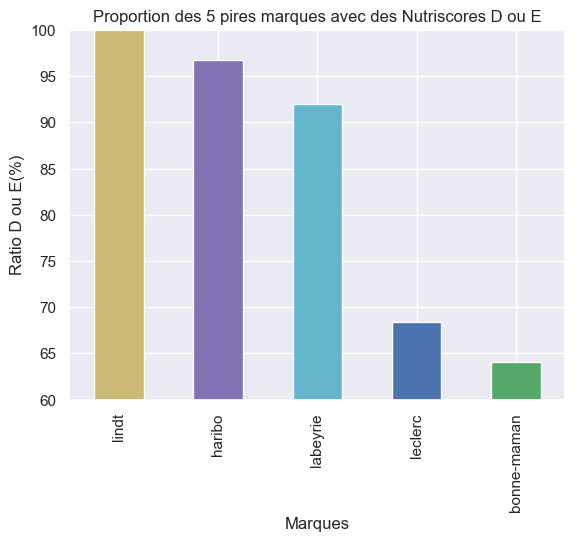

In [664]:
worst_NS_ratio.iloc[:,-1].plot.bar(ylim=(60,100), ylabel="Ratio D ou E(%)", xlabel="Marques",\
                                 color=list_color[::-1],\
                                 title="Proportion des 5 pires marques avec des Nutriscores D ou E")

# Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

In [488]:
env.head(2)

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False


In [519]:
eco = env.copy()

eco = eco.pivot_table(index="brands_tags", columns ="ecoscore_grade", values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)
eco

ecoscore_grade,a,b,c,d,e,not-applicable,unknown,All
brands_tags,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
"0,neuhauser",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
"0,ranou",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
0-sauce,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,NaN,NaN,1.0,1.0,1.0,NaN,2.0,5.0
...,...,...,...,...,...,...,...,...
"데미-소다,demisoda",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
"샘표,saempyo,sempio",NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
"자연은,jayeon-eun",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0


In [527]:
eco = eco[eco.All > 500]

eco["totale_abcde"] = eco.iloc[:,0:5].sum(axis=1)
eco

ecoscore_grade,a,b,c,d,e,not-applicable,unknown,All,totale_abcde
brands_tags,,,,,,,,,
andros,54.0,248.0,67.0,95.0,3.0,1.0,367.0,835.0,467.0
auchan,379.0,1825.0,1258.0,1768.0,1254.0,112.0,4466.0,11062.0,6484.0
barilla,30.0,85.0,82.0,22.0,8.0,NaN,407.0,634.0,227.0
belle-france,64.0,437.0,278.0,337.0,227.0,30.0,296.0,1669.0,1343.0
bio-village,12.0,176.0,65.0,105.0,33.0,15.0,632.0,1038.0,391.0
...,...,...,...,...,...,...,...,...,...
u,401.0,1147.0,1156.0,905.0,605.0,145.0,2312.0,6671.0,4214.0
"u-bio,u",123.0,158.0,116.0,56.0,11.0,14.0,140.0,618.0,464.0
"u-saveurs,u",32.0,91.0,88.0,88.0,47.0,1.0,160.0,507.0,346.0


In [529]:
eco2 = env.copy()
eco2['ecoscore_grade'].replace('unknown', np.NaN, inplace = True)
eco2['ecoscore_grade'].replace('not-applicable', np.NaN, inplace = True)
eco2.ecoscore_grade.unique()

array(['d', nan, 'c', 'e', 'b', 'a'], dtype=object)

In [531]:
eco2 = eco2[["brands_tags","ecoscore_grade"]]
eco2 = eco2.groupby(by="brands_tags").ecoscore_grade.agg(["count"]).sort_values(by="count", ascending=False)
eco2

,count
brands_tags,
carrefour,6567
auchan,6496
u,4215
casino,2917
leader-price,2827
...,...
"kinder,kinder-surprise,ferrero",0
"kinder,kinder-ferrero",0
"kinder,kinder-country",0


In [532]:
print("Le nombre de marque totale est :", eco2.index.nunique())
print("Ceci est une liste des marques qui affichent le ecoscore: \n", eco2[eco2["count"]>0])
print("Le nombre de marque totale est :", eco2.index.nunique())
print("Ceci est une liste des marques qui n'affichent pas le ecoscore: \n", eco2[eco2["count"]==0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui affichent le ecoscore: 
                                 count
brands_tags                          
carrefour                        6567
auchan                           6496
u                                4215
casino                           2917
leader-price                     2827
...                               ...
f-ili-carta                         1
frantoio-batta                      1
frantorio-antosso-davide-figli      1
francois-debessy                    1
sapori-piaceri                      1

[33220 rows x 1 columns]
Le nombre de marque totale est : 58298
Ceci est une liste des marques qui n'affichent pas le ecoscore: 
                                 count
brands_tags                          
sainsburys,sainsbury-s              0
vitaflor,apiculte                   0
vitaly-s,vitaly-s                   0
saint-bernard                       0
scharbofrost                        0
...       

([<matplotlib.patches.Wedge at 0x2343e7eaa50>,
 [Text(1.073635766656085, -0.2393872188668411, 'Avec NS'),
  Text(-1.0736357442430313, 0.23938731938787502, 'Sans NS')],
 [Text(0.5856195090851372, -0.1305748466546406, '57.0%'),
  Text(-0.5856194968598352, 0.13057490148429546, '43.0%')])

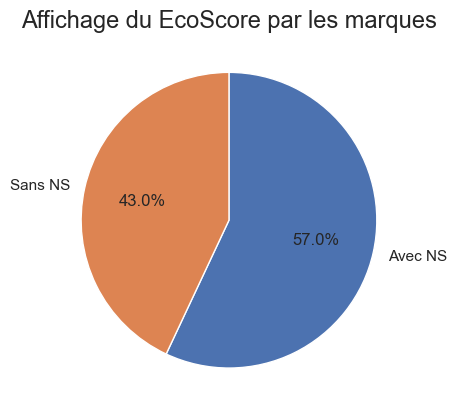

In [533]:
eco2_x = len(eco2[eco2["count"]>0])
eco2_y = len(eco2[eco2["count"]==0])

x = [eco2_x, eco2_y]
label =["Avec NS", "Sans NS"]

plt.title("Affichage du EcoScore par les marques", fontsize=17)

plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")


# Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

In [188]:
env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932866 entries, 0 to 932865
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   code            932866 non-null  object
 1   product_name    907007 non-null  object
 2   quantity        279260 non-null  object
 3   brands_tags     463922 non-null  object
 4   countries_tags  932866 non-null  object
 5   serving_size    89842 non-null   object
 6   image_url       842701 non-null  object
 7   ecoscore_grade  931887 non-null  object
 8   est_plastique   932866 non-null  bool  
 9   est_palm        932866 non-null  bool  
 10  est_cocoa       932866 non-null  bool  
dtypes: bool(3), object(8)
memory usage: 59.6+ MB


In [185]:
env.ecoscore_grade.unique()

array(['d', 'unknown', 'c', 'e', 'b', 'not-applicable', 'a', nan],
      dtype=object)

In [190]:
env_temp = env.copy()

#remplacer soit par inconnu soit par le nom du produit
env_temp["brands_tags"] = env_temp["brands_tags"].fillna(env_temp["product_name"])


env_temp.dropna(subset="ecoscore_grade", inplace=True)
env_a = env_temp[["brands_tags"]]

#get_dummies permets de transformer des données qualifiant sous forme bool
env_b = pd.get_dummies(env_temp.ecoscore_grade)

env_marge = env_a.join(env_b)
env_marge.dropna(inplace=True)
env_marge

,brands_tags,a,b,c,d,e
0,danone,0,0,0,1,0
3,courte-paille,0,0,1,0,0
8,Pate d'amande,0,0,0,0,1
9,Salade de carottes râpées,0,1,0,0,0
22,crous,0,1,0,0,0
...,...,...,...,...,...,...
932843,Confiture de pêche,0,1,0,0,0
932844,Jus de pomme trouble,0,0,1,0,0
932858,Riz au lait,0,1,0,0,0
932860,Pain d’epices,0,1,0,0,0


In [191]:
#transformer les bool aux ciffres
scores_env = {"a":5, "b":4, "c":3, "d":2, "e":1}
env_marge['score_total'] = env_marge[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_env)), axis=1)

env_trie = env_marge.sort_values('score_total', ascending=False)
env_trie


,brands_tags,a,b,c,d,e,score_total
296807,auchan,1,0,0,0,0,5
384992,hipp,1,0,0,0,0,5
309686,lustucru,1,0,0,0,0,5
309687,lustucru,1,0,0,0,0,5
309691,lustucru,1,0,0,0,0,5
...,...,...,...,...,...,...,...
353888,carrefour,0,0,0,0,1,1
353860,Noix de cajou Grillée,0,0,0,0,1,1
353845,Huile de noisette,0,0,0,0,1,1
353840,Huile de noix,0,0,0,0,1,1


In [192]:
top_ES = env_trie.groupby(by="brands_tags").sum().sort_values(by="score_total", ascending=False).head(5)
top_ES

,a,b,c,d,e,score_total
brands_tags,,,,,,
auchan,379,1830,1261,1771,1255,17795
carrefour,411,1646,1282,1900,1328,17613
u,401,1147,1156,905,606,12477
casino,174,852,636,763,492,8204
leader-price,162,788,569,829,479,7806


<Axes: title={'center': 'Top 5 marques au Ecoscore'}, xlabel='brands_tags'>

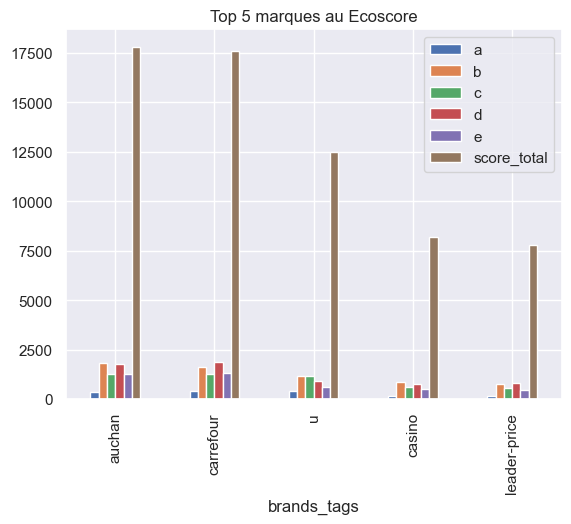

In [194]:
top_ES.plot.bar(title="Top 5 marques au Ecoscore")

In [195]:
worst_ES = quali_trie.groupby(by="brands_tags").sum()
count_product = worst_ES.a+worst_ES.b+worst_ES.c+worst_ES.d+worst_ES.e
worst_ES = worst_ES[count_product>250].sort_values(by="score_total", ascending=True).head(5)
worst_ES

,a,b,c,d,e,score_total
brands_tags,,,,,,
milka,0,0,2,22,272,322
larnaudie,14,18,15,24,183,418
le-comptoir-de-mathilde,0,2,37,115,123,472
president,1,6,19,164,68,482
lindt,0,0,0,12,491,515


<Axes: title={'center': '...Et les pire!'}, xlabel='brands_tags'>

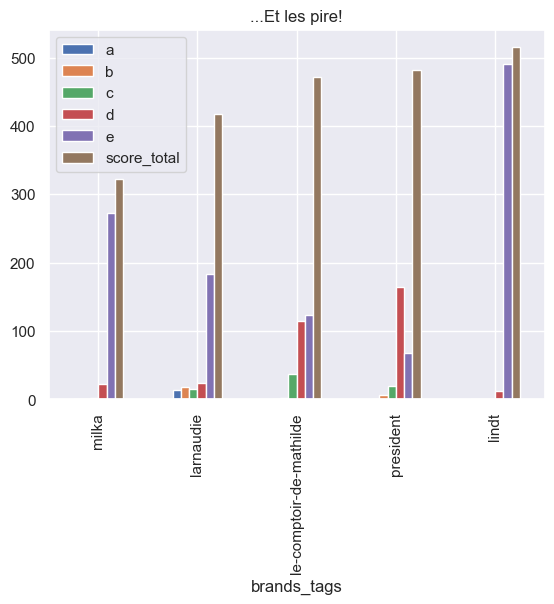

In [196]:
worst_ES.plot.bar(title="...Et les pire!")

# Quelles sont les marques qui proposent essentiellement des produits biologiques ?

In [197]:
bio

,product_name,brands_tags,serving_size,est_bio
0,Skyr,danone,NaN,False
1,moutarde au moût de raisin,courte-paille,NaN,False
2,Solène céréales poulet,crous,NaN,False
3,Tarte noix de coco,"crous-resto,crous",NaN,False
4,Crème dessert chocolat,ferme-de-la-fremondiere,NaN,False
...,...,...,...,...
463917,Saveur ABRICIT,gerble,NaN,False
463918,Lindt pâte à tartiner,lindt,NaN,False
463919,Biodrink antioxydant pendant effort,punch-power,NaN,True
463920,miel de fleurs sauvage,miellerie-de-la-natouze,NaN,False


In [198]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463922 entries, 0 to 463921
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_name  456563 non-null  object
 1   brands_tags   463922 non-null  object
 2   serving_size  86178 non-null   object
 3   est_bio       463922 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 11.1+ MB


In [245]:
bio_tem = bio.copy()
bio_tem = bio_tem[["brands_tags","est_bio"]]



bio_ratio = bio_tem.groupby(by="brands_tags").est_bio.agg([sum,"count"]).sort_values("sum", ascending=False)
bio_ratio["ratio%"] = bio_ratio["sum"]/bio_ratio["count"]*100

ind2 = bio_ratio[bio_ratio["count"] <500].index
bio_ratio.drop(ind2, inplace = True)

bio_ratio = bio_ratio.sort_values("ratio%", ascending=False).head(10)
bio_ratio

,sum,count,ratio%
brands_tags,,,
"carrefour-bio,carrefour",539,542,99.446494
"u-bio,u",610,618,98.705502
"bio-village,marque-repere",852,866,98.383372
biocoop,768,828,92.753623
bonneterre,552,616,89.610390
bio-village,947,1060,89.339623
primeal,648,728,89.010989
moulin-des-moines,792,892,88.789238
la-vie-claire,1938,2187,88.614540


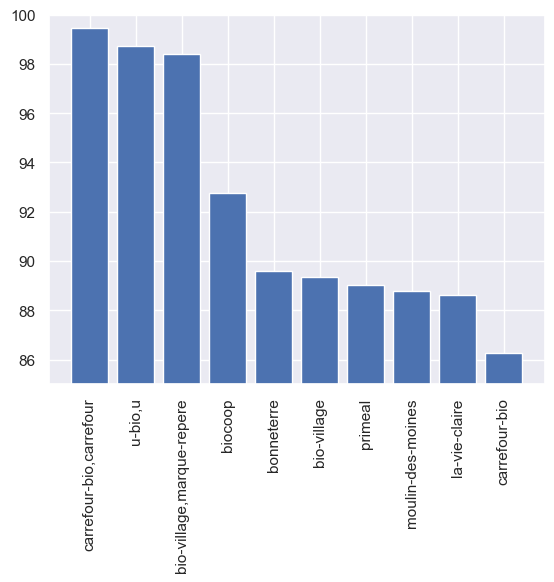

In [270]:
b_ratio_plot = bio_ratio[["ratio%"]]
fig, ax = plt.subplots()
bio_x = bio_ratio.index
bio_y = bio_ratio["ratio%"]
ax.set_ylim(85,100)
plt.xticks(rotation=90)

ax.bar(bio_x, bio_y)


plt.show()

# Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ?

In [248]:
quali["nutriscore_A"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "a"]
quali["nutriscore_B"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "b"]
quali["nutriscore_C"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "c"]
quali["nutriscore_D"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "d"]
quali["nutriscore_E"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "e"]

In [249]:
correl_bio_quali = quali.merge(bio, how= "inner", on= ["brands_tags","product_name"], indicator = "merge")
correl_bio_quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size_x,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nutriscore_A,nutriscore_B,nutriscore_C,nutriscore_D,nutriscore_E,serving_size_y,est_bio,merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,NaN,False,both
1,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,140g,False,both
2,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,NaN,False,both
3,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,NaN,False,both
4,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,1 pot (140g),False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741499,996299394093,Nutra'cake framboise,NaN,delical,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,381.0,12.7,6.70,29.0,15.6,0.80,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,both
1741500,997046,Chocolat noir patissier,NaN,monoprix-bio,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,578.0,39.0,24.00,46.0,5.1,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,both
1741501,998042,Saveur ABRICIT,NaN,gerble,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,both
1741502,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,both


In [251]:
# Regardons la distibution si les variables étaient complétement independantes
# Création de ma table de contingence
X = "nutriscore_grade"
Y = "est_bio"

cont_1 = correl_bio_quali[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(correl_bio_quali[[X,Y]].dropna())
indep = (tx.dot(ty) / n)
indep

est_bio,False,True,Total
nutriscore_grade,,,
a,135893.521695,15380.478305,151274.0
b,82438.572342,9330.427658,91769.0
c,100119.444759,11331.555241,111451.0
d,131344.393664,14865.606336,146210.0
e,70789.067540,8011.932460,78801.0
Total,520585.000000,58920.000000,579505.0


# Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

# Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

# Quelles marques faut-il recommander ?

# Quelles marques ne faut-il surtout pas recommander ?